# Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

# Objective

1. Explore and visualize the dataset.

2. Build a linear regression model to predict the prices of used cars.

3. Generate a set of insights and recommendations that will help the business.

**Data Dictionary -** 

S.No. : Serial Number

Name : Name of the car which includes Brand and Model name

Location : The location(Cities) in which the car is being sold or available for purchase

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven by the car in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100,000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# Loading libraries

In [74]:
#pip install mlxtend

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# to do mathematical computations
import math

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# Set visual theme for all matplotlib and seaborn plots
sns.set()

# Display all columns without any limit
pd.set_option("display.max_columns", None)

# Set limit to display 200 rows
pd.set_option("display.max_rows", 200)


# For building linear model to predict
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



## Read and Understand the data from data source(.csv file)

Read the csv file and parse it to understand the properties such as dimesion, column, types, names, etc.

In [76]:
data = pd.read_csv("used_cars_data.csv")

print("Rows # %s and columns # %s" % (data.shape[0], data.shape[1]))

Rows # 7253 and columns # 14


In [77]:
# Create a duplicate the DataFrame object using copy method
data1 = data.copy()

# Visualize the data with n = 10
np.random.seed(1)  # seed the generator to keep getting same random results
data1.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [78]:
# Get the details of dataframeobject data1
# It will help us to understand which are python datatype(int, float, etc) and which are python objects.
# We have to convert objects to numberical datatype for processing and analyzsing.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
S.No.                7253 non-null int64
Name                 7253 non-null object
Location             7253 non-null object
Year                 7253 non-null int64
Kilometers_Driven    7253 non-null int64
Fuel_Type            7253 non-null object
Transmission         7253 non-null object
Owner_Type           7253 non-null object
Mileage              7251 non-null object
Engine               7207 non-null object
Power                7078 non-null object
Seats                7200 non-null float64
New_Price            1006 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


 Mileage, Engine, Power, & New_Price are objects(They are mix of strings with int/float). We will be converting them to numerical datatype.

## Processing Data

We will process data from columns Mileage, Engine, Power & New_Price and convert them to numerical datatype from object datatype.

#### Engine: 
Engine column has data as object. We will split it to get numerical value out of it.


In [79]:
# We will split the numerical data from Engine column and later store it in new column

data1_engine = data1["Engine"].str.split(" ", expand=True)
data1_engine.head(n=10)

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC
5,814,CC
6,1461,CC
7,2755,CC
8,1598,CC
9,1248,CC


In [80]:
# To find out how many rows have CC in second column
data1_engine[1].value_counts()

CC    7207
Name: 1, dtype: int64

In [81]:
# we will create a new column for engine numerical value
data1["engine_numerical_data"] = data1_engine[0].astype(float)

# print the new dataframe
data1.head()



,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0


#### Power

* Power column has data as object. We will split it to get numerical value out of it.


In [82]:
# Similar to previous steps, split the data of power column to get nuerical value.
data1_power = data1["Power"].str.split(" ", expand=True)

# print n=10 data
data1_power.head(n=10)

,0,1
0,58.16,bhp
1,126.2,bhp
2,88.7,bhp
3,88.76,bhp
4,140.8,bhp
5,55.2,bhp
6,63.1,bhp
7,171.5,bhp
8,103.6,bhp
9,74,bhp


In [83]:
# To calculate how many rows has bhp as power unit
data1_power[1].value_counts()

bhp    7078
Name: 1, dtype: int64

In [84]:
# Similar to previous step, we will create a new column for power numerical values
data1["power_numerical_data"] = data1_power[0].astype(float)

# printing the new dataframe
data1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80


In [85]:
# Find out all the rows where value is NaN for power
# isnull() method return a boolean same-sized object indicating if the values are NA.
# NA values, such as None or numpy.NaN, gets mapped to True values.


data1_power[data1_power.isnull().any(axis=1)].head()

print(
    f"There are {data1_power[data1_power.isnull().any(axis=1)].shape[0]} rows with Nan(null) data"
)

There are 175 rows with Nan(null) data


In [86]:
# To remove the NA values we need to some filtering
# we will create a function which will return float value or np.nan depending on different scenarios


def convert_to_float(power_val):
    """
    param: power_value
    return: np.nan or float value
    # If power_value is instance of float
    # If power_value is instance a string and not null, then split it and take first index
    # If power_value is neither float nor string, so it NaN, return np.nan
    """
    if isinstance(power_val, float):
        return power_val
    elif isinstance(power_val, str):
        if power_val != "null":
            return float(power_val.split()[0])
        else:
            return np.nan
    else:
        return np.nan

In [87]:
# we will apply filter_power_values function to data1["Power"] column
data1["power_numerical_value"] = data1["Power"].apply(convert_to_float)

# Checking the new dataframe
data1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,140.80


#### Mileage

* In the dataset we have car mileage in two measurement units kmpl and km/kg.  kmpl is used for cars with Fuel_type Petrol or Diesel. km/kg is used for cars with Fuel_type CNG or LPG


In [88]:
# split the Mileage column data
data1_mileage = data1["Mileage"].str.split(" ", expand=True)

# print the first 10 rows after spliting the number and measurementunit(kmpl or km/kg)
data1_mileage.head(n=10)

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl
5,21.1,km/kg
6,23.08,kmpl
7,11.36,kmpl
8,20.54,kmpl
9,22.3,kmpl


In [89]:
# To find out how many rows in dataset we have for kmpl, km/kg
data1_mileage[1].value_counts()

kmpl     7177
km/kg      74
Name: 1, dtype: int64

In [90]:
# we will create two new columns for mileage values and units
# we will introduce two new columns to store the numerical value and measurement units separately

data1["km_per_unit_fuel"] = data1_mileage[0].astype(float)
data1["measurement_unit"] = data1_mileage[1]

# print the new dataframe
data1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16,58.16,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20,126.20,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70,88.70,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76,88.76,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,140.80,15.20,kmpl


In [91]:
# Group Fuel_type and measurement_unit together and calculate the size
data1.groupby(by=["Fuel_Type", "measurement_unit"]).size()

Fuel_Type  measurement_unit
CNG        km/kg                 62
Diesel     kmpl                3852
LPG        km/kg                 12
Petrol     kmpl                3325
dtype: int64

#### New_Price 

* New_Price is in INR Lakhs & Cr, we will extract the numerical part of the value. There are two units - Lakh and Cr.
* 1 Cr = 100 Lakhs. We will convert later Cr to lakhs for consistent numerical format.

In [92]:
# splitting the numerical and string value
data1_new_price = data1["New_Price"].str.split(" ", expand=True)

# printing for n=10
data1_new_price.head(10)

,0,1
0,NaN,NaN
1,NaN,NaN
2,8.61,Lakh
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,21,Lakh
8,NaN,NaN
9,NaN,NaN


Observation: There are a lot of null(Nan) entries in New_Price column.

In [93]:
# convert the new_price column to a numerical float value and convert Cr to lakhs

def convert_to_float_new_price(price_val):
    """
    param: price_val
    return: float value of numerical part or np.nan

    This function check if the value is float, string or np.nan and decide what to do accordingly.
    Since 1 Cr = 100 lakkhs, we weill convert all Cr to lakhs by multiplying the numerical value with 100
    """
    if isinstance(price_val, float):
        return price_val
    elif isinstance(price_val, str):
        if price_val != "null":
            if price_val.split()[1].lower() == "cr":
                return float(price_val.split()[0]) * 100  # 1 Cr = 100 Lakhs
            else:
                return float(price_val.split()[0])
        else:
            return np.nan
    else:
        return np.nan


In [94]:
# let's apply the function to the New_Price column
data1["new_price_num"] = data1["New_Price"].apply(convert_to_float_new_price)

# Checking the new dataframe
data1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998.0,58.16,58.16,26.60,km/kg,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582.0,126.20,126.20,19.67,kmpl,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199.0,88.70,88.70,18.20,kmpl,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248.0,88.76,88.76,20.77,kmpl,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,140.80,15.20,kmpl,NaN


## Feature Analysis

In [95]:
data1["Name"].nunique()

2041

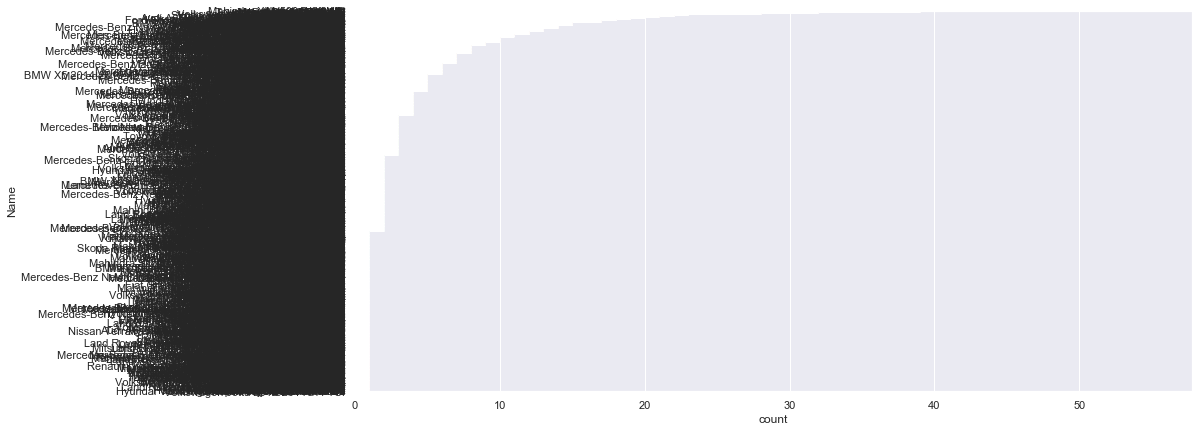

In [96]:
#Let us plot a graph with feature Name
plt.figure(figsize=(15, 7))
sns.countplot(y="Name", data=data1, order=data1["Name"].value_counts().index)

There are so many unique values in Name column we can not analyze any trend out of it. Plot is very messy. Since in our dataset name consists of two parts, let's split it into Brand Name and Model Name.

In [97]:
# Split Name column and get Brand Name and Model Name
data1["Brand_Name"] = data1["Name"].apply(lambda x: x.split(" ")[0].lower()) #first index of list is brand name

data1["Model_Name"] = data1["Name"].apply(lambda x: x.split(" ")[1].lower()) #second index of list is model name


In [98]:
print(
    f'There are {data1["Brand_Name"].nunique()} unique brands and {data1["Model_Name"].nunique()} unique models'
)

There are 32 unique brands and 218 unique models


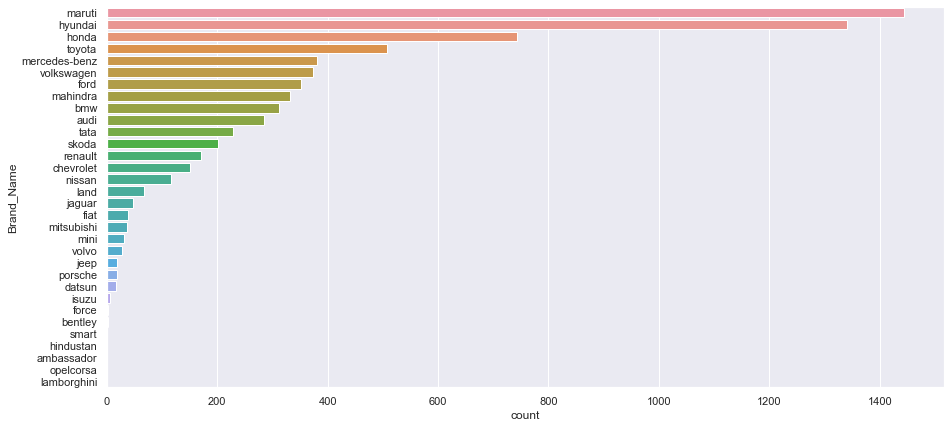

In [99]:
#Plot the brand name vs their count

plt.figure(figsize=(15, 7))

sns.countplot(
    y="Brand_Name", data=data1, order=data1["Brand_Name"].value_counts().index
)


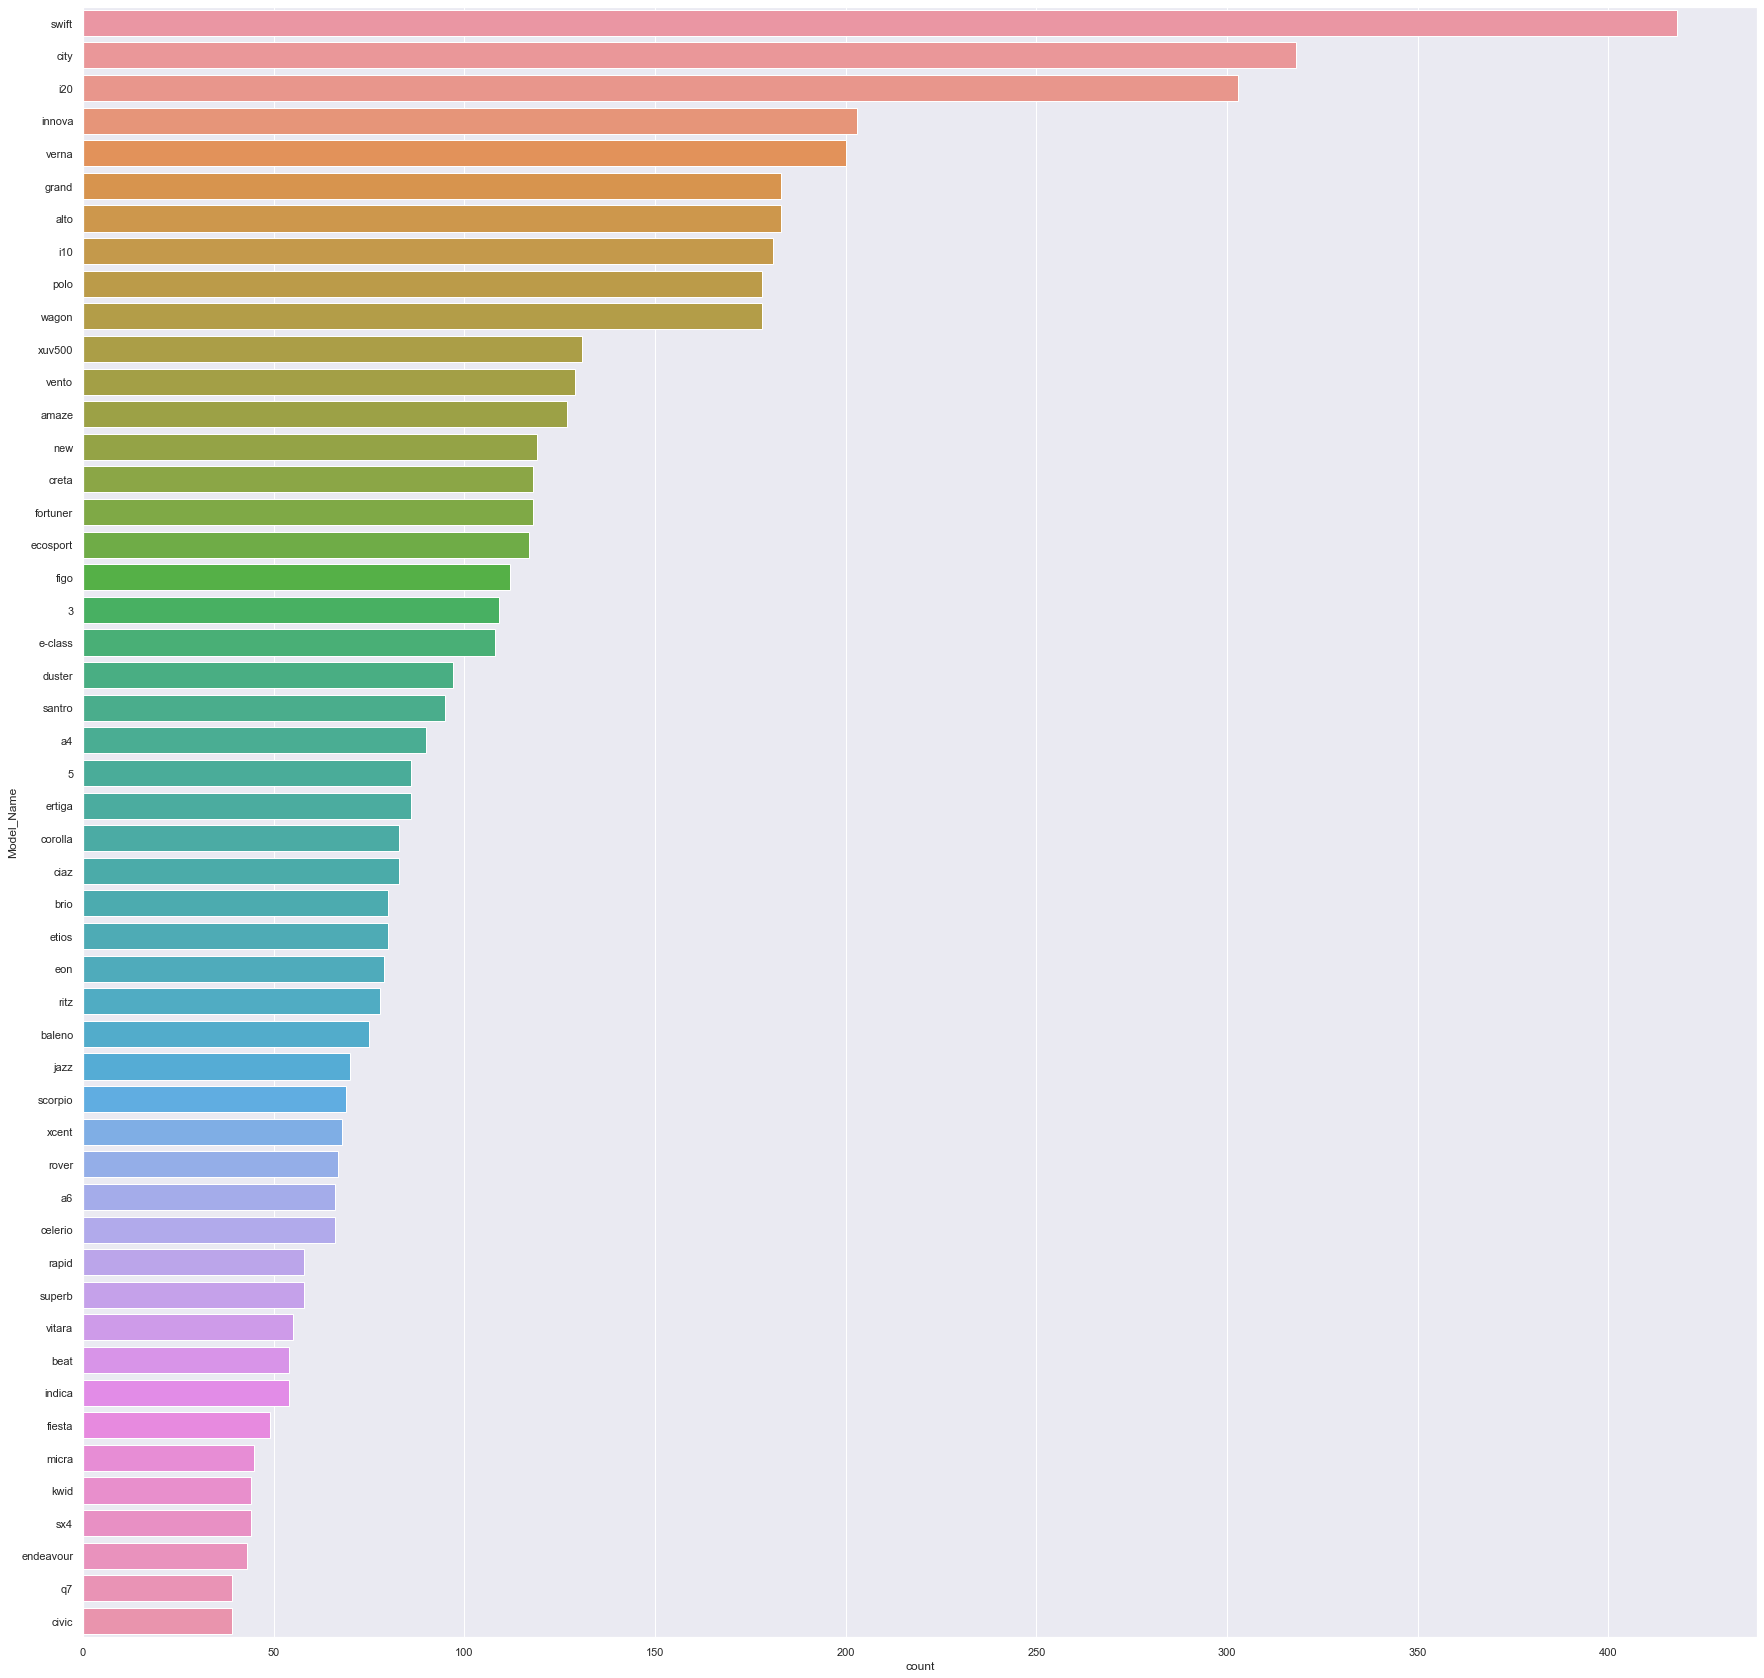

In [100]:
# Since there 218 unique models, let's plot top 50

plt.figure(figsize=(30, 30))

sns.countplot(
    y="Model_Name", data=data1, order=data1["Model_Name"].value_counts().index[:50]
)

In [101]:
# Grouping the Brand_Name with Price column
# it can be concluded that high end brands have higher price tag and price goes down as with brand recognition.

data1.groupby(["Brand_Name"])["Price"].mean().sort_values(ascending=False)

Brand_Name
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

## Performing EDA - Exploratory Data Analysis

In [102]:
print("The number of empty cells or null or NaNs in each column \n")
print("\nColumn Name : \n", "-----------------", "\n", data1.isnull().sum())

The number of empty cells or null or NaNs in each column 


Column Name : 
 ----------------- 
 S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_Price                6247
Price                    1234
engine_numerical_data      46
power_numerical_data      175
power_numerical_value     175
km_per_unit_fuel            2
measurement_unit            2
new_price_num            6247
Brand_Name                  0
Model_Name                  0
dtype: int64


In [103]:
# Let's get the summary stats of the dataset
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
engine_numerical_data,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
power_numerical_data,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
power_numerical_value,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
km_per_unit_fuel,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


***Observations***:
1. Oldest car is in 1996 year and latest car is of 2019 year.
2. Min number of seat is zero. It is not possible for a car to have zero number of seta. We need to check this.
3. Min Km_drove is also zero. It may be because of some nan present. Also, maximum km_drove is 6500000 km. 
4. 
   

In [104]:
# checking extreme values in Kilometers_Driven
data1.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit,new_price_num,Brand_Name,Model_Name
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.00,2993.0,258.00,258.00,15.97,kmpl,NaN,bmw,x5
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,7.50,1968.0,141.00,141.00,19.30,kmpl,NaN,skoda,octavia
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.90,1598.0,103.60,103.60,20.54,kmpl,NaN,volkswagen,vento
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.70,1197.0,78.90,78.90,20.36,kmpl,NaN,hyundai,i10
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,NaN,13.00,1968.0,138.03,138.03,16.96,kmpl,NaN,volkswagen,jetta
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,5.00,1497.0,117.30,117.30,17.40,kmpl,NaN,honda,city
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.45,1197.0,82.90,82.90,18.50,kmpl,NaN,hyundai,i20
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,NaN,1248.0,74.00,74.00,23.40,kmpl,NaN,maruti,swift
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.0,NaN,1.00,1405.0,70.00,70.00,17.00,kmpl,NaN,tata,indigo
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,NaN,4.00,2494.0,102.00,102.00,12.80,kmpl,NaN,toyota,innova


It looks like the first row here is a data entry error. A car manufactured as recently as 2017 having been driven 6500000 km is almost impossible.

We can check it using univariate analysis(box plot) whether it's outlier or not.

In [105]:
# checking extreme values in Kilometers_Driven
data1.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit,new_price_num,Brand_Name,Model_Name
1361,1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,3.60,796.0,47.30,47.30,24.70,kmpl,NaN,maruti,alto
5606,5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,6.8 Lakh,6.25,1197.0,81.80,81.80,21.50,kmpl,6.80,maruti,wagon
1198,1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78 kmpl,999 CC,75 bhp,5.0,6.74 Lakh,5.68,999.0,75.00,75.00,18.78,kmpl,6.74,volkswagen,polo
5941,5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.45 Lakh,3.40,799.0,53.30,53.30,25.17,kmpl,4.45,renault,kwid
6201,6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.99 Lakh,NaN,796.0,47.30,47.30,24.70,kmpl,3.99,maruti,alto
1161,1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.3 kmpl,1199 CC,84 bhp,5.0,NaN,6.85,1199.0,84.00,84.00,20.30,kmpl,NaN,tata,tigor
1598,1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.0,NaN,7.50,2179.0,138.03,138.03,13.49,kmpl,NaN,tata,xenon
173,173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,7.39 Lakh,6.50,1197.0,81.86,81.86,18.90,kmpl,7.39,hyundai,grand
1242,1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.6 kmpl,1999 CC,177 bhp,5.0,52.77 Lakh,40.00,1999.0,177.00,177.00,13.60,kmpl,52.77,jaguar,xe
5339,5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19 kmpl,1197 CC,81.86 bhp,5.0,10.25 Lakh,8.60,1197.0,81.86,81.86,17.19,kmpl,10.25,hyundai,i20


In [106]:
data1.sort_values(by=["Seats"], ascending=True).head(10)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit,new_price_num,Brand_Name,Model_Name
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,0.0,NaN,18.00,3197.0,NaN,NaN,10.5,kmpl,NaN,audi,a4
693,693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.54,3498.0,306.00,306.00,18.1,kmpl,NaN,mercedes-benz,slk-class
798,798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.00,3498.0,306.00,306.00,18.1,kmpl,NaN,mercedes-benz,slk-class
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,NaN,120.00,5204.0,560.00,560.00,6.4,kmpl,NaN,lamborghini,gallardo
4722,4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1 kmpl,5461 CC,387.3 bhp,2.0,NaN,29.50,5461.0,387.30,387.30,8.1,kmpl,NaN,mercedes-benz,sl-class
134,134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,95.04 Lakh,54.00,2996.0,362.07,362.07,19.0,kmpl,95.04,mercedes-benz,slc
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0 kmpl,799 CC,NaN,2.0,NaN,3.00,799.0,NaN,NaN,0.0,kmpl,NaN,smart,fortwo
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0 kmpl,3436 CC,NaN,2.0,NaN,40.00,3436.0,NaN,NaN,9.0,kmpl,NaN,porsche,cayman
5919,5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,NaN,100.00,5000.0,488.10,488.10,12.5,kmpl,NaN,jaguar,f
4691,4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.0 kmpl,5461 CC,421 bhp,2.0,NaN,90.00,5461.0,421.00,421.00,12.0,kmpl,NaN,mercedes-benz,slk-class


It shows that Audi A4 has 0 seats. It may due to some outlier (data entry error). 

In [107]:
# Let us check if we have a similar car in our dataset.
data1[data1["Name"].str.startswith("Audi A4")]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit,new_price_num,Brand_Name,Model_Name
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968.0,140.80,140.80,15.20,kmpl,NaN,audi,a4
50,50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.43,1968.0,174.33,174.33,17.11,kmpl,NaN,audi,a4
65,65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,13.50,1968.0,140.00,140.00,16.55,kmpl,NaN,audi,a4
103,103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,9.80,2967.0,241.40,241.40,14.94,kmpl,NaN,audi,a4
150,150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,23.32,1968.0,174.33,174.33,17.11,kmpl,NaN,audi,a4
717,717,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979,Diesel,Automatic,Second,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,19.50,1968.0,174.33,174.33,17.11,kmpl,NaN,audi,a4
853,853,Audi A4 2.0 TDI,Delhi,2011,46000,Diesel,Automatic,Second,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,10.99,1968.0,147.51,147.51,16.55,kmpl,NaN,audi,a4
854,854,Audi A4 2.0 TDI,Kolkata,2012,47346,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,14.50,1968.0,147.51,147.51,16.55,kmpl,NaN,audi,a4
874,874,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,12.50,1968.0,140.00,140.00,16.55,kmpl,NaN,audi,a4
964,964,Audi A4 2.0 TDI,Kolkata,2009,34000,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,9.95,1968.0,147.51,147.51,16.55,kmpl,NaN,audi,a4


It indicates the Audi A4 typically has 5 seats.

In [108]:
# Let us replace #seats in row index 3999 (Audi A4 carrying 0 seat) with 5 (general seat in Audi car)
data1.loc[3999, "Seats"] = 5.0

It indicates the Audi A4 typically has 5 seats.

In [109]:
# Check maximum no seat in cars
data1.sort_values(by=["Seats"], ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit,new_price_num,Brand_Name,Model_Name
2575,2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,5.50,2499.0,80.0,80.0,14.80,kmpl,NaN,chevrolet,tavera
1907,1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.65,2446.0,75.0,75.0,13.10,kmpl,NaN,toyota,qualis
6288,6288,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,NaN,2499.0,80.0,80.0,14.80,kmpl,NaN,chevrolet,tavera
6242,6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,12.2 kmpl,1948 CC,68 bhp,10.0,NaN,NaN,1948.0,68.0,68.0,12.20,kmpl,NaN,tata,sumo
814,814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.50,2446.0,75.0,75.0,13.10,kmpl,NaN,toyota,qualis
917,917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07 kmpl,1978 CC,83.1 bhp,10.0,NaN,5.25,1978.0,83.1,83.1,14.07,kmpl,NaN,tata,sumo
6875,6875,Toyota Qualis FS B3,Pune,2002,119613,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,NaN,2446.0,75.0,75.0,13.10,kmpl,NaN,toyota,qualis
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0 kmpl,2446 CC,NaN,10.0,NaN,3.50,2446.0,NaN,NaN,0.00,kmpl,NaN,toyota,qualis
2312,2312,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58 kmpl,2499 CC,78 bhp,9.0,NaN,4.75,2499.0,78.0,78.0,13.58,kmpl,NaN,chevrolet,tavera
2359,2359,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,9.0,NaN,4.50,2489.0,93.7,93.7,14.95,kmpl,NaN,mahindra,xylo


There are many cars with 10 no. of seats. It may not be an outlier in `seat` column of data.

In [110]:
# checking extreme values in Mileage - km_per_unit_fuel
data1.sort_values(by=["km_per_unit_fuel"], ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,engine_numerical_data,power_numerical_data,power_numerical_value,km_per_unit_fuel,measurement_unit,new_price_num,Brand_Name,Model_Name
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,NaN,1.12,1086.0,NaN,NaN,0.0,kmpl,NaN,hyundai,santro
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0 kmpl,999 CC,NaN,5.0,NaN,2.30,999.0,NaN,NaN,0.0,kmpl,NaN,hyundai,santro
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.85,NaN,NaN,NaN,0.0,kmpl,NaN,honda,city
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,NaN,5.0,NaN,5.45,1968.0,NaN,NaN,0.0,kmpl,NaN,volkswagen,jetta
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,NaN,2179.0,115.0,115.0,0.0,kmpl,NaN,land,rover
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,NaN,3.35,1086.0,NaN,NaN,0.0,kmpl,NaN,hyundai,santro
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0 kmpl,1086 CC,NaN,5.0,NaN,1.17,1086.0,NaN,NaN,0.0,kmpl,NaN,hyundai,santro
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,26.00,2179.0,115.0,115.0,0.0,kmpl,NaN,land,rover
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,15.50,2179.0,115.0,115.0,0.0,kmpl,NaN,land,rover
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,3.15,NaN,NaN,NaN,0.0,kmpl,NaN,hyundai,santro


We will have to treat Mileage = 0 as missing values

## Missing Values

Before we start looking at the individual distributions and interactions, let's quickly check the missing entries in each column of the data

In [111]:
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_Price                6247
Price                    1234
engine_numerical_data      46
power_numerical_data      175
power_numerical_value     175
km_per_unit_fuel            2
measurement_unit            2
new_price_num            6247
Brand_Name                  0
Model_Name                  0
dtype: int64

1. 2 cars don't have entries for `Mileage`
2. `Engine`, `Power` of 46, 175 respectively data is missing 
3.  175 entries missing in `power_numerical_value` column
4.  53 entries missing in `Seats` column
5. 6247 missing entries in `New_Price` column


In [112]:
# dropping the redundant columns.
data1.drop(
    columns=["Mileage","Engine", "measurement_unit","Power", "power_numerical_data" ,"New_Price"], inplace=True
)

## Distributions

### Price

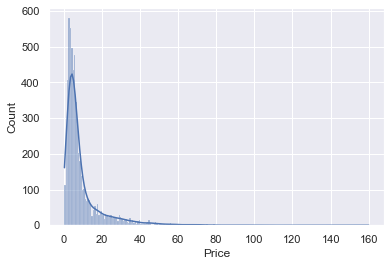

In [113]:
sns.histplot(data=data1, x="Price", kde=True)

This is a highly skewed distribution. Let us use log transformation on this column to see if that helps normalize the distribution.

Text(0.5, 0, 'Log(price)')

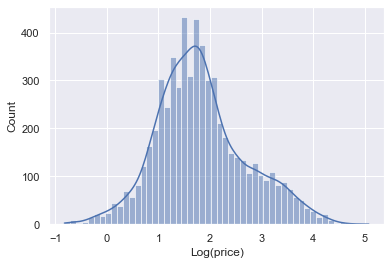

In [114]:
sns.histplot(np.log(data1["Price"]), kde=True)
plt.xlabel("Log(price)")

Using the log transformation has definitely helped in reducing the skew.

In [115]:
# Creating a new column with the transformed variable.
data1["price_log"] = np.log(data1["Price"])

### Price vs Location

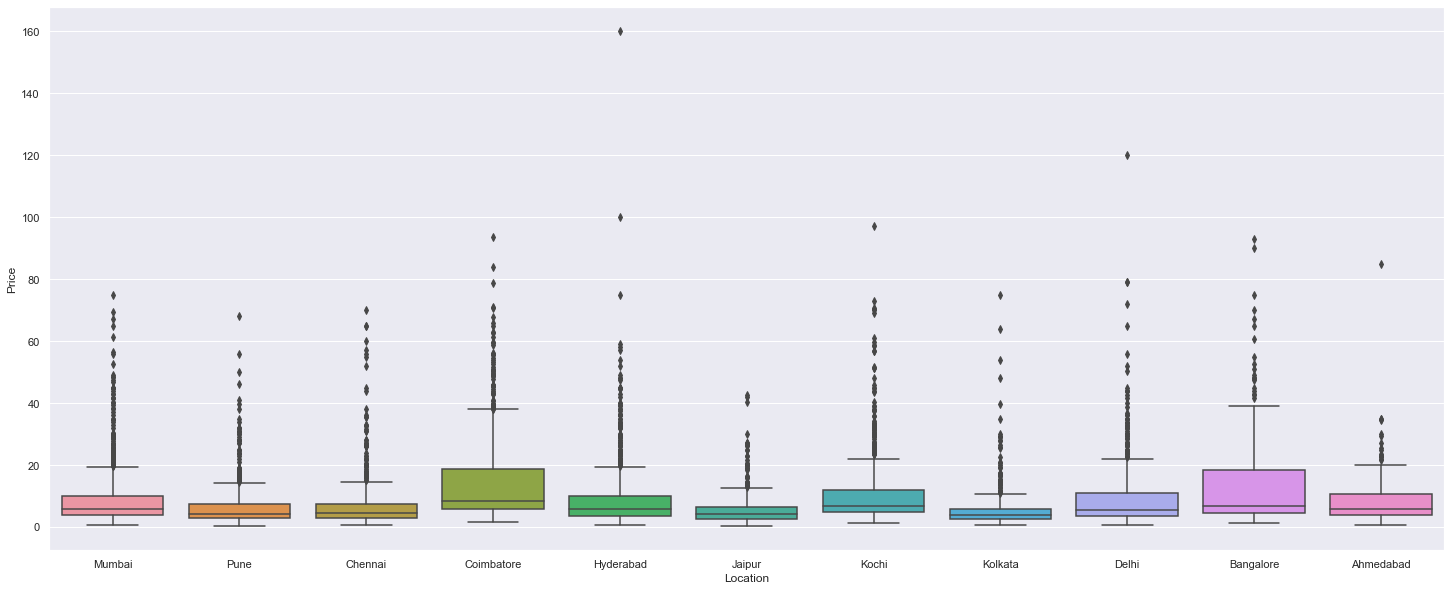

In [116]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="Location", y="Price", data=data1)

The price of used cars has a large IQR in Coimbatore and Bangalore

### Kilometers_Driven

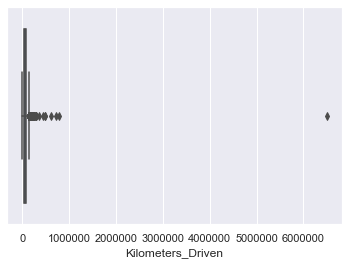

In [117]:
sns.boxplot(data=data1, x="Kilometers_Driven")

It does have an outlier around 6500000 km, which we were guessing from EDA analysis

Text(0.5, 0, 'Log(Kilometers_Driven)')

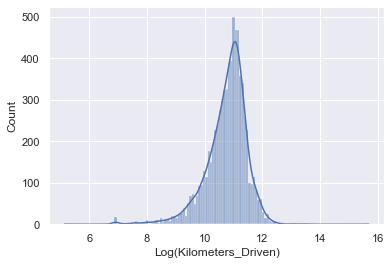

In [118]:
# Log transformation
sns.histplot(np.log(data1["Kilometers_Driven"]), kde=True)
plt.xlabel("Log(Kilometers_Driven)")

Transformation has reduced the extreme skewness.

In [119]:
data1["kilometers_driven_log"] = np.log(data1["Kilometers_Driven"])

### Bivariate Distributions

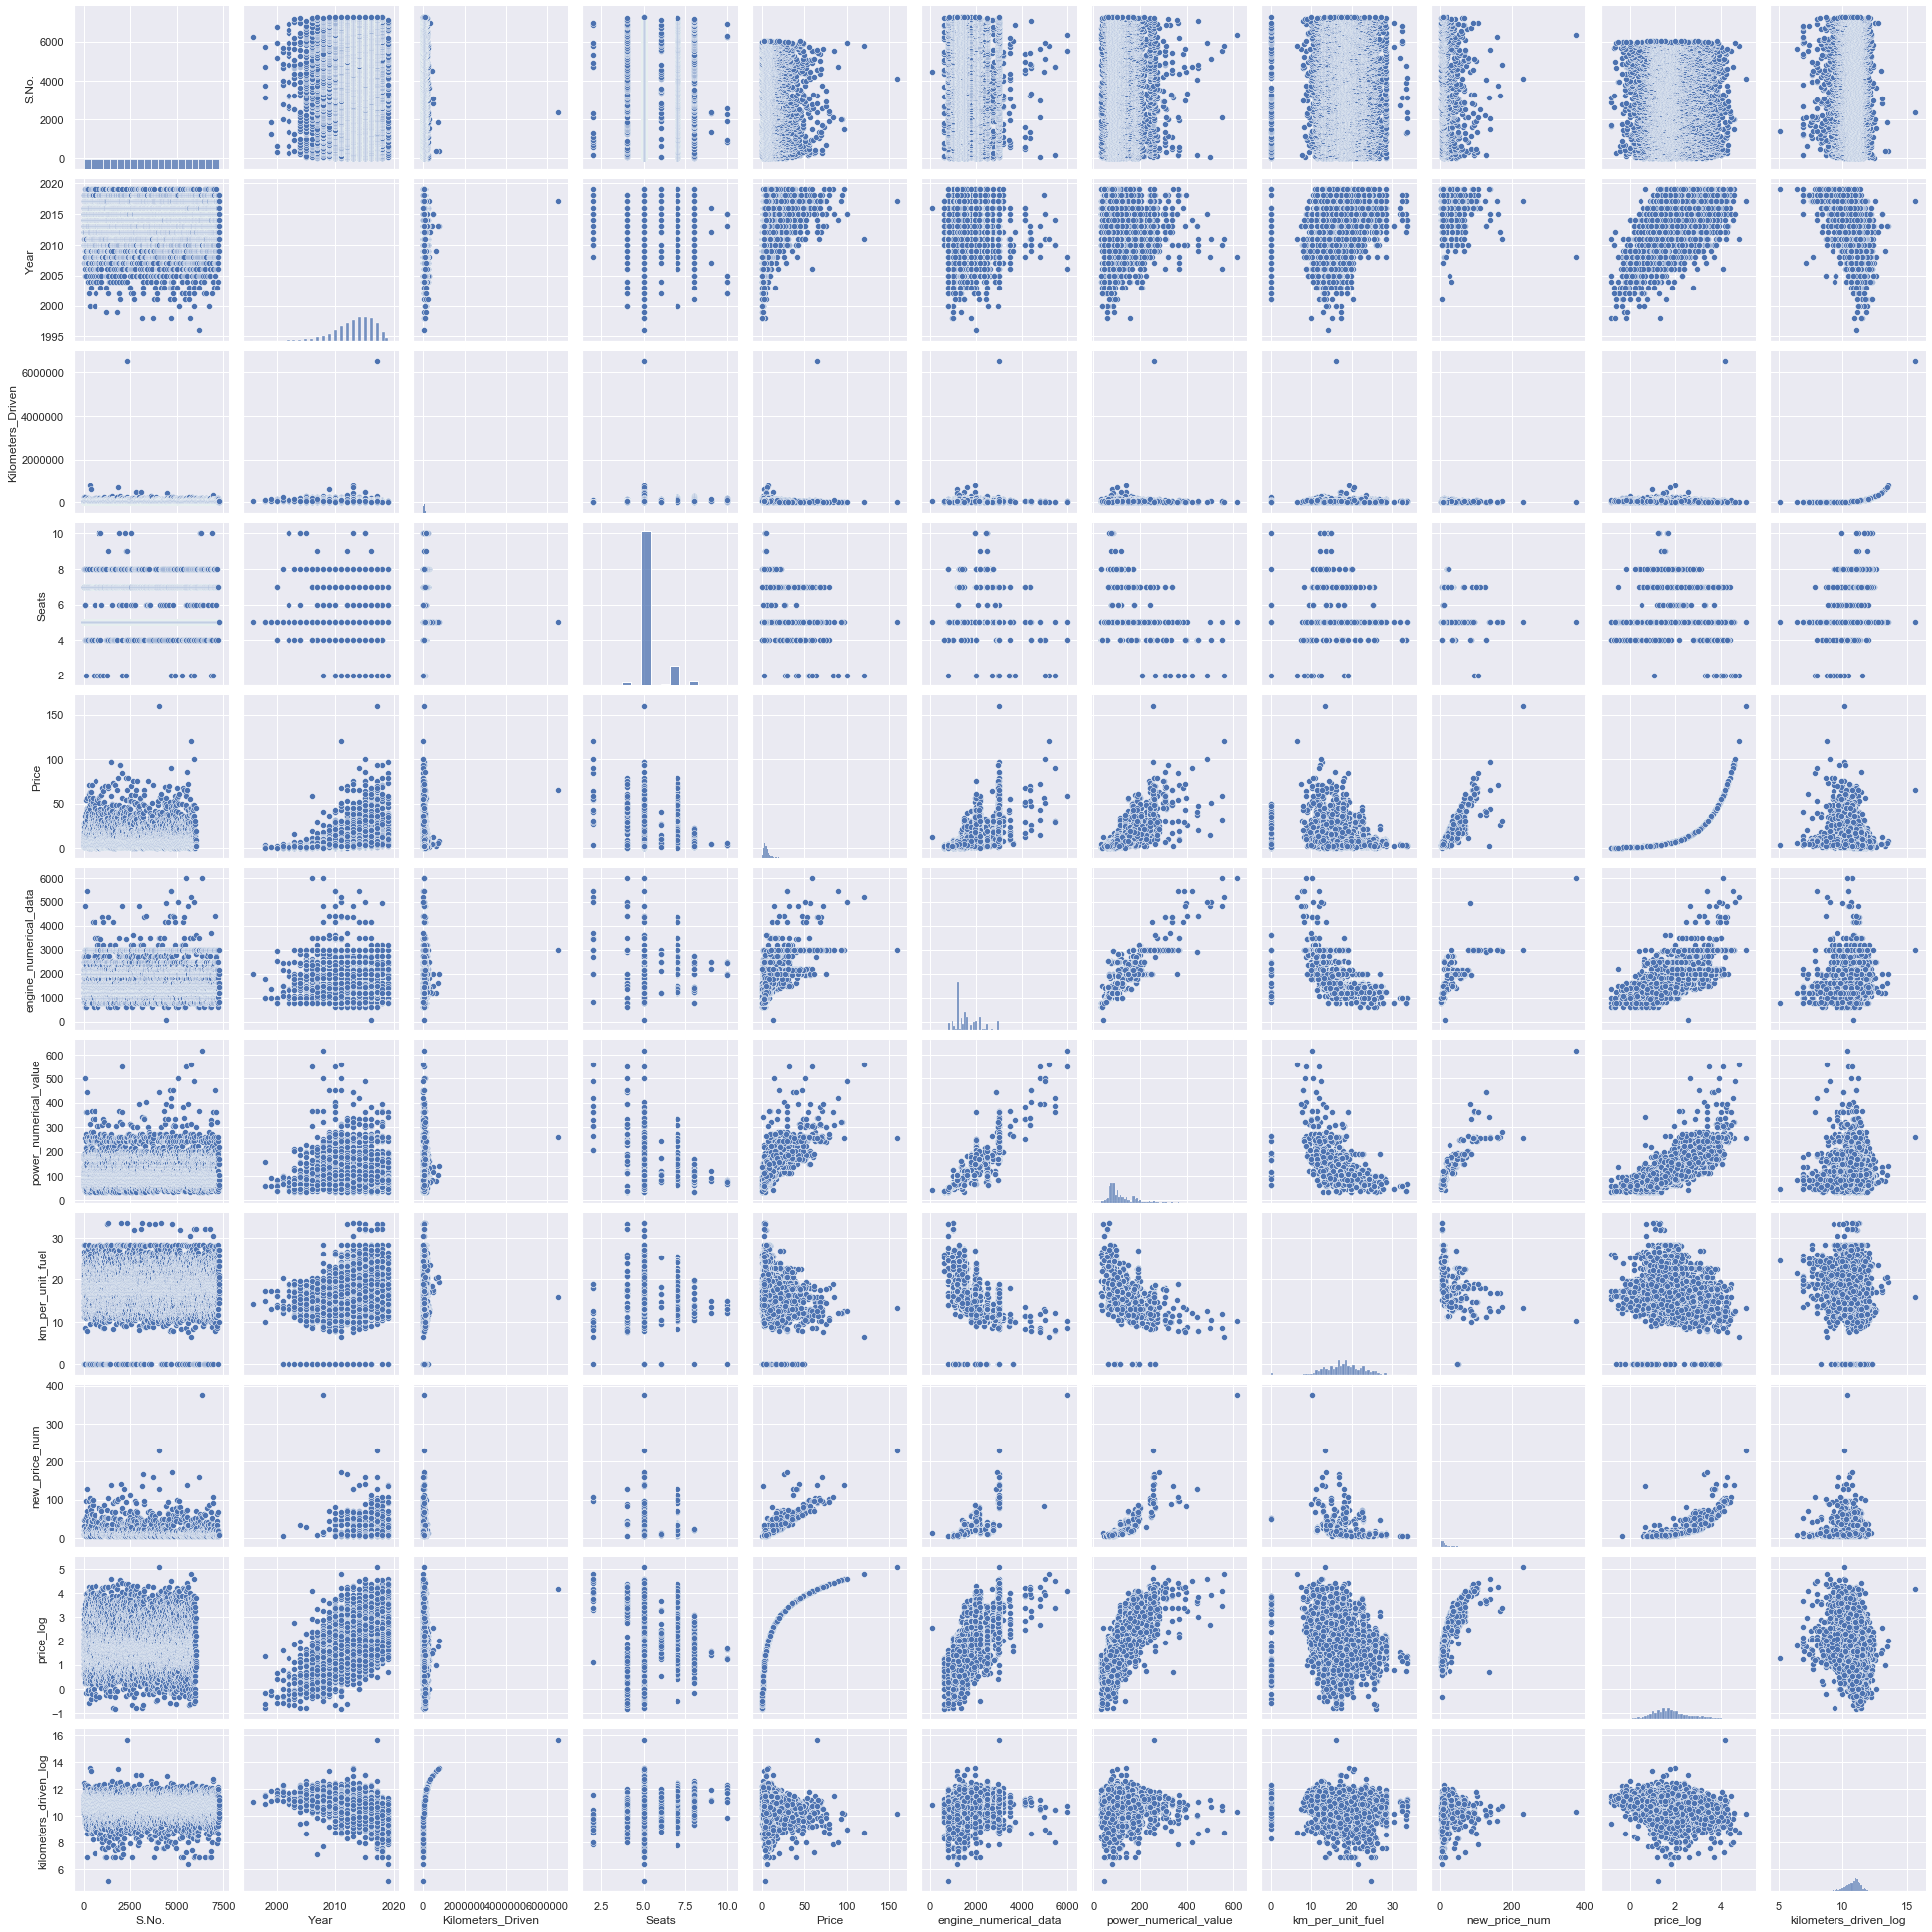

In [120]:
sns.pairplot(data1)

Zooming into these plots gives us a lot of information.

* It seems kilometers driven does not much impact the price.
* Kilometers Driven has some relation with the Year.
* Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

### Correlation between numerical variables

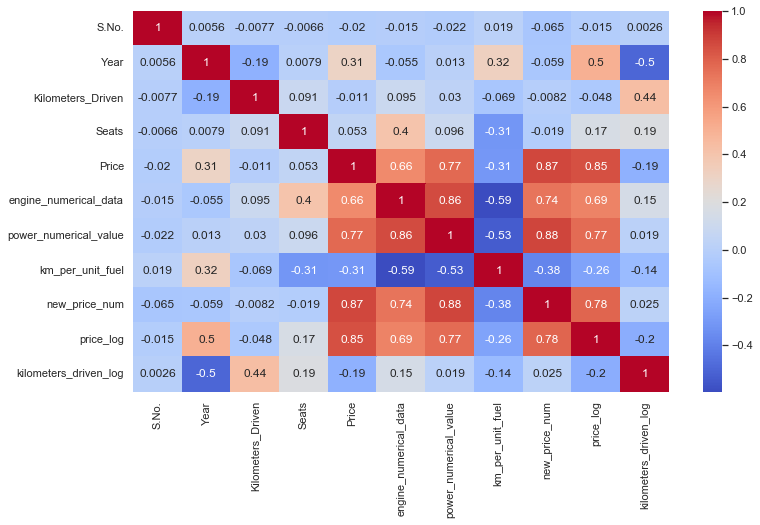

In [121]:
plt.figure(figsize=(12, 7))
sns.heatmap(data1.corr(), annot=True, cmap="coolwarm")

* Power and engine are important predictors of price
* We will have to work on imputing New Price missing values because this is a very important feature in predicting used car price accurately 

## Missing Value Treatment

In [122]:
# let's check again for missing values
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
Price                    1234
engine_numerical_data      46
power_numerical_value     175
km_per_unit_fuel            2
new_price_num            6247
Brand_Name                  0
Model_Name                  0
price_log                1234
kilometers_driven_log       0
dtype: int64

1. We have 42 missing elements in `seat` column
2. We have 36 elements missing in `engine_num` column 
3. We have 143 elements missing in `power_numerical` column

### Seats

In [123]:
# let's look at a few rows where seats is missing
data1[data1["Seats"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,engine_numerical_data,power_numerical_value,km_per_unit_fuel,new_price_num,Brand_Name,Model_Name,price_log,kilometers_driven_log
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,2.95,NaN,NaN,0.00,NaN,honda,city,1.081805,11.002200
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,NaN,2.11,NaN,NaN,16.10,NaN,maruti,swift,0.746688,10.645449
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,3.60,1498.0,99.0,0.00,NaN,ford,figo,1.280934,11.162460
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,NaN,1.75,NaN,NaN,16.10,NaN,maruti,swift,0.559616,11.490680
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,26.50,NaN,NaN,0.00,NaN,land,rover,3.277145,10.915107
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,NaN,3.20,NaN,NaN,12.80,NaN,honda,city,1.163151,10.915179
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,NaN,5.80,NaN,NaN,16.10,NaN,maruti,swift,1.757858,10.825661
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,1.50,NaN,NaN,0.00,NaN,honda,city,0.405465,11.652687
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,40.88,NaN,NaN,0.00,NaN,land,rover,3.710641,11.142992
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,NaN,1.70,1493.0,100.0,13.00,NaN,honda,city,0.530628,11.385092


We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the Brand and Model name.

In [124]:
data1.groupby(["Brand_Name", "Model_Name"], as_index=False)["Seats"].median()

,Brand_Name,Model_Name,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
5,audi,a8,5.0
6,audi,q3,5.0
7,audi,q5,5.0
8,audi,q7,7.0
9,audi,rs5,4.0


In [125]:
# Impute missing Seats
data1["Seats"] = data1.groupby(["Brand_Name", "Model_Name"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [126]:
# Check 'Seats'
data1[data1["Seats"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,engine_numerical_data,power_numerical_value,km_per_unit_fuel,new_price_num,Brand_Name,Model_Name,price_log,kilometers_driven_log
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,NaN,1.50,1061.0,NaN,19.5,NaN,maruti,estilo,0.405465,10.933107
3882,3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,NaN,2.50,1061.0,NaN,19.5,NaN,maruti,estilo,0.916291,10.596635
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,NaN,1.75,1061.0,NaN,19.5,NaN,maruti,estilo,0.559616,10.839581


In [127]:
# Maruti Estilo can accomodate 5
data1["Seats"] = data1["Seats"].fillna(5.0)

We will use a similar method to fill missing values for engine, power, and new price.

In [128]:
data1["engine_numerical_data"] = data1.groupby(["Brand_Name", "Model_Name"])["engine_numerical_data"].transform(
   lambda x: x.fillna(x.median())
)


In [129]:
data1["new_price_num"] = data1.groupby(["Brand_Name", "Model_Name"])["new_price_num"].transform(
    lambda x: x.fillna(x.median())
)

In [130]:
data1["power_numerical_value"] = data1.groupby(["Brand_Name", "Model_Name"])["power_numerical_value"].transform(
    lambda x: x.fillna(x.median())
)

In [131]:
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
engine_numerical_data       0
power_numerical_value      12
km_per_unit_fuel            2
new_price_num            1512
Brand_Name                  0
Model_Name                  0
price_log                1234
kilometers_driven_log       0
dtype: int64

* There are still some missing values in power, mileage and new_price_num.
* There are a few car brands and models in our dataset that do not contain the new price information at all.
* We'll impute these missing values one-by-one by taking the median number of seats for the particular car using the Brand name.

In [132]:
cols1 = ["power_numerical_value", "km_per_unit_fuel", "new_price_num"]

for ii in cols1:
    data1[ii] = data1.groupby(["Brand_Name"])[ii].transform(lambda x: x.fillna(x.median()))

In [133]:
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
engine_numerical_data       0
power_numerical_value       2
km_per_unit_fuel            0
new_price_num             159
Brand_Name                  0
Model_Name                  0
price_log                1234
kilometers_driven_log       0
dtype: int64

* There are still some missing values in power and new_price_num.
* We'll have to estimate the new price using median of the data.

In [134]:
cols1 = ["power_numerical_value", "km_per_unit_fuel", "new_price_num"]

for ii in cols1:
    data1[ii] = data1[ii].fillna(data1[ii].median())

In [135]:
data1.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
engine_numerical_data       0
power_numerical_value       0
km_per_unit_fuel            0
new_price_num               0
Brand_Name                  0
Model_Name                  0
price_log                1234
kilometers_driven_log       0
dtype: int64

In [136]:
# dropping the redundant columns
data1.drop(columns=["Kilometers_Driven", "Name", "S.No."], inplace=True)

# dropping the rows where 'Price' == NaN, and proceed to modeling
data1 = data1[data1["Price"].notna()]

# Linear Model Building

1. We want to predict the price, so we will use the normalized version 'price_log' for modeling.
2. Before we proceed to build a model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.
4. We will build a Linear Regression model using the train data and evaluate the model performance.

### Define dependent variable

In [137]:
ind_vars = data1.drop(["Price", "price_log"], axis=1)
dep_var = data1["price_log"]


### Creating dummy variables

In [138]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Seats,engine_numerical_data,power_numerical_value,km_per_unit_fuel,new_price_num,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Name_audi,Brand_Name_bentley,Brand_Name_bmw,Brand_Name_chevrolet,Brand_Name_datsun,Brand_Name_fiat,Brand_Name_force,Brand_Name_ford,Brand_Name_honda,Brand_Name_hyundai,Brand_Name_isuzu,Brand_Name_jaguar,Brand_Name_jeep,Brand_Name_lamborghini,Brand_Name_land,Brand_Name_mahindra,Brand_Name_maruti,Brand_Name_mercedes-benz,Brand_Name_mini,Brand_Name_mitsubishi,Brand_Name_nissan,Brand_Name_porsche,Brand_Name_renault,Brand_Name_skoda,Brand_Name_smart,Brand_Name_tata,Brand_Name_toyota,Brand_Name_volkswagen,Brand_Name_volvo,Model_Name_1000,Model_Name_3,Model_Name_5,Model_Name_6,Model_Name_7,Model_Name_800,Model_Name_a,Model_Name_a-star,Model_Name_a3,Model_Name_a4,Model_Name_a6,Model_Name_a7,Model_Name_a8,Model_Name_accent,Model_Name_accord,Model_Name_alto,Model_Name_amaze,Model_Name_ameo,Model_Name_aspire,Model_Name_aveo,Model_Name_avventura,Model_Name_b,Model_Name_baleno,Model_Name_beat,Model_Name_beetle,Model_Name_bolero,Model_Name_bolt,Model_Name_boxster,Model_Name_br-v,Model_Name_brio,Model_Name_brv,Model_Name_c-class,Model_Name_camry,Model_Name_captiva,Model_Name_captur,Model_Name_cayenne,Model_Name_cayman,Model_Name_cedia,Model_Name_celerio,Model_Name_ciaz,Model_Name_city,Model_Name_civic,Model_Name_cla,Model_Name_classic,Model_Name_cls-class,Model_Name_clubman,Model_Name_compass,Model_Name_continental,Model_Name_cooper,Model_Name_corolla,Model_Name_countryman,Model_Name_cr-v,Model_Name_creta,Model_Name_crosspolo,Model_Name_cruze,Model_Name_d-max,Model_Name_duster,Model_Name_dzire,Model_Name_e,Model_Name_e-class,Model_Name_ecosport,Model_Name_eeco,Model_Name_elantra,Model_Name_elite,Model_Name_endeavour,Model_Name_enjoy,Model_Name_eon,Model_Name_ertiga,Model_Name_esteem,Model_Name_estilo,Model_Name_etios,Model_Name_evalia,Model_Name_f,Model_Name_fabia,Model_Name_fiesta,Model_Name_figo,Model_Name_fluence,Model_Name_fortuner,Model_Name_fortwo,Model_Name_freestyle,Model_Name_fusion,Model_Name_gallardo,Model_Name_getz,Model_Name_gl-class,Model_Name_gla,Model_Name_glc,Model_Name_gle,Model_Name_gls,Model_Name_go,Model_Name_grand,Model_Name_grande,Model_Name_hexa,Model_Name_i10,Model_Name_i20,Model_Name_ignis,Model_Name_ikon,Model_Name_indica,Model_Name_indigo,Model_Name_innova,Model_Name_jazz,Model_Name_jeep,Model_Name_jetta,Model_Name_koleos,Model_Name_kuv,Model_Name_kwid,Model_Name_lancer,Model_Name_laura,Model_Name_linea,Model_Name_lodgy,Model_Name_logan,Model_Name_m-class,Model_Name_manza,Model_Name_micra,Model_Name_mobilio,Model_Name_montero,Model_Name_mustang,Model_Name_mux,Model_Name_nano,Model_Name_new,Model_Name_nexon,Model_Name_nuvosport,Model_Name_octavia,Model_Name_omni,Model_Name_one,Model_Name_optra,Model_Name_outlander,Model_Name_pajero,Model_Name_panamera,Model_Name_passat,Model_Name_petra,Model_Name_platinum,Model_Name_polo,Model_Name_prius,Model_Name_pulse,Model_Name_punto,Model_Name_q3,Model_Name_q5,Model_Name_q7,Model_Name_qualis,Model_Name_quanto,Model_Name_r-class,Model_Name_rapid,Model_Name_redi,Model_Name_redi-go,Model_Name_renault,Model_Name_ritz,Model_Name_rover,Model_Name_rs5,Model_Name_s,Model_Name_s-class,Model_Name_s-cross,Model_Name_s60,Model_Name_s80,Model_Name_safari,Model_Name_sail,Model_Name_santa,Model_Name_santro,Model_Name_scala,Model_Name_scorpio,Model_Name_siena,Model_Name_sl-class,Model_Name_slc,Model_Name_slk-class,Model_Name_sonata,Model_Name_spark,Model_Name_ssangyong,Model_Name_sumo,Model_Name_sunny,Model_Name_superb,Model_Name_swift,Model_Name_sx4,Model_Name_tavera,Model_Name_teana,Model_Name_terrano,Model_Name_thar,Model_Name_tiago,Model_Name_tigor,Model_Name_tiguan

### Split the data into train and test

In [139]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [140]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in train data = 1806


### Fitting a linear model

In [141]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,1.063573e-01
Seats,3.755082e-03
engine_numerical_data,-1.242027e-04
power_numerical_value,3.030077e-03
km_per_unit_fuel,-1.396677e-04
new_price_num,7.316724e-03
kilometers_driven_log,-7.550233e-02
Location_Bangalore,1.745475e-01
Location_Chennai,5.416189e-02
Location_Coimbatore,1.444449e-01


**Let us check the model performance on training data.**

In [143]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = np.exp(model.predict(inp))
    y_act = np.exp(out)

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [144]:
# Checking model performance on train set
print("Training Performance:")
model_perf(lin_reg_model, x_train, y_train)

Training Performance:


,RMSE,MAE,R^2,Adjusted R^2
0,2.726211,1.196561,0.941875,0.937989


* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in the price of used cars up to 94%.
* The model is not an underfitting model.
* Let us do a quick performance check on the test data.

In [145]:
# Checking model performance on test set
print("Test Performance:")
model_perf(lin_reg_model, x_test, y_test)

Test Performance:


,RMSE,MAE,R^2,Adjusted R^2
0,3.238137,1.335421,0.911704,0.896577


* The model can explain more than 91% of the variation in the test data, which is very good.
* Root Mean Squared Error of train and test data are close, which indicates that our model is not overfitting the train data.
* Mean Absolute Error indicates that our current model is able to predict used car prices within a mean error of 1.3 lakhs on test data.
* The units of both RMSE and MAE are the same - Lakhs in this case. But RMSE is greater than MAE because it penalizes the outliers more.

## Forward Feature Selection

Let us try using forward feature selection to check if we can get a good model performance using lesser number of features.

In [146]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 124 out of 264 | elapsed:    2.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    3.1s finished

[2021-11-20 07:29:54] Features: 1/264 -- score: 0.5742558515529481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 263 out of 263 | elapsed:    0.8s finished

[2021-11-20 07:29:54] Features: 2/264 -- score: 0.8086804559005623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 262 out of 262 | elapsed:    0.9s finished

[2021-11-20 07:29:55] Features: 3/264 -- score: 0.8392984792349493[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    1.0s finished

[2021-11-20 07:29:57] Features: 4/264 -- score: 0.8615384747563365[

[Parallel(n_jobs=-1)]: Done 224 out of 231 | elapsed:    4.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed:    4.9s finished

[2021-11-20 07:31:32] Features: 34/264 -- score: 0.9280473887952443[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    4.8s finished

[2021-11-20 07:31:37] Features: 35/264 -- score: 0.9285986118361214[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 222 out of 229 | elapsed:    5.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    5.9s finished

[2021-11-20 07:31:43] Features: 36/264 -- score: 0.9292223185154281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    2.4s
[Parall

[Parallel(n_jobs=-1)]: Done 198 out of 205 | elapsed:    9.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 205 out of 205 | elapsed:    9.6s finished

[2021-11-20 07:34:58] Features: 60/264 -- score: 0.9388656801755191[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   11.3s finished

[2021-11-20 07:35:10] Features: 61/264 -- score: 0.9391866922005739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 196 out of 203 | elapsed:    9.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 203 out of 203 | elapsed:    9.7s finished

[2021-11-20 07:35:20] Features: 62/264 -- score: 0.9395207112613682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   12.5s finished

[2021-11-20 07:39:35] Features: 85/264 -- score: 0.9447941081272184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   12.3s finished

[2021-11-20 07:39:48] Features: 86/264 -- score: 0.9449531435700855[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   12.2s finished

[2021-11-20 07:40:00] Features: 87/264 -- score: 0.9451018829770659[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 con


[2021-11-20 07:45:00] Features: 110/264 -- score: 0.947307716388672[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 154 out of 154 | elapsed:   12.7s finished

[2021-11-20 07:45:13] Features: 111/264 -- score: 0.9473674155652677[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   12.8s finished

[2021-11-20 07:45:26] Features: 112/264 -- score: 0.9474249363684428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 152 out of 152 | elapsed:   12.9s finished

[2021-11-20 07:45:40] Features: 113/264 -- score: 0.9474877430784089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.2s finished

[2021-11-20 07:52:06] Features: 140/264 -- score: 0.9485205672731073[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:   13.2s finished

[2021-11-20 07:52:20] Features: 141/264 -- score: 0.9485313239492417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 123 out of 123 | elapsed:   13.1s finished

[2021-11-20 07:52:34] Features: 142/264 -- score: 0.9485403582281353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 122 out of 122 | elapsed:   13.3s finished

[2021-11-20 07:52:48] Features: 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   13.1s finished

[2021-11-20 07:59:02] Features: 170/264 -- score: 0.948962566219955[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  94 out of  94 | elapsed:   12.8s finished

[2021-11-20 07:59:16] Features: 171/264 -- score: 0.9489625662199556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  93 out of  93 | elapsed:   14.5s finished

[2021-11-20 07:59:30] Features: 172/264 -- score: 0.9489625662199558[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  92 out of  92 | elapsed:   12.7s finished

[2021-11-20 07:59:44] Features: 1

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:   11.9s finished

[2021-11-20 08:05:33] Features: 200/264 -- score: 0.9488922661872747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   11.6s finished

[2021-11-20 08:05:45] Features: 201/264 -- score: 0.9488836168681087[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   11.4s finished

[2021-11-20 08:05:57] Features: 202/264 -- score: 0.9488747558013687[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:   11.4s finished

[2021-11-20 08:06:09] Features: 

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    7.9s finished

[2021-11-20 08:11:21] Features: 231/264 -- score: 0.9483405508154622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    8.6s finished

[2021-11-20 08:11:30] Features: 232/264 -- score: 0.9483046579832376[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.1s finished

[2021-11-20 08:11:38] Features: 233/264 -- score: 0.9482580793523739[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    7.0s finished

[2021-11-20 08:11:46] Features: 234/264 -- score: 0.9482116751849746[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.2s finished

[2021-11-20 08:11:54] Features: 235/264 -- score: 0.948160127840

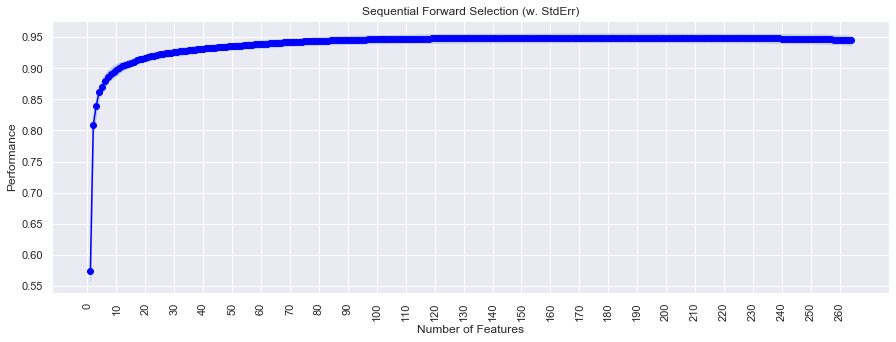

In [147]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(
    np.arange(0, 264, 10), np.arange(0, 264, 10), rotation=90
)  # to make the tick marks readable
plt.show()

* The model performance appears to have become constant somewhere around 120 features and then starts slightly falling around 2234 features.
* The improvement in performance from 90 to 120 features is not that high either.
* We will take 90 as the number of features to consider.

In [148]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features = 90,
    forward=True,
    floating=False,
    scoring="r2",
    verbose=2,
    cv=5,
    n_jobs=-1,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    0.7s finished

[2021-11-20 08:14:34] Features: 1/90 -- score: 0.5742558515529481[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 263 out of 263 | elapsed:    0.9s finished

[2021-11-20 08:14:35] Features: 2/90 -- score: 0.8086804559005623[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 262 out of 262 | elapsed:    0.9s finished

[2021-11-20 08:14:36] Features: 3/90 -- score: 0.8392984792349493[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    1.2s finished

[2021-11-20 08:14:37] Features: 4/90 -- score: 0.8615384747563365[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:    1.2s finished



[Parallel(n_jobs=-1)]: Done 229 out of 229 | elapsed:    5.8s finished

[2021-11-20 08:16:23] Features: 36/90 -- score: 0.9292223185154281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 228 out of 228 | elapsed:    6.8s finished

[2021-11-20 08:16:30] Features: 37/90 -- score: 0.9298153003977901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 220 out of 227 | elapsed:    5.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 227 out of 227 | elapsed:    5.4s finished

[2021-11-20 08:16:36] Features: 38/90 -- score: 0.9304047062350609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 226 out of 226 | elapsed:    5.2s finished

[2021-11-20 08:16:4

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 202 out of 202 | elapsed:    9.5s finished

[2021-11-20 08:19:47] Features: 63/90 -- score: 0.9398323061544029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 194 out of 201 | elapsed:    8.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 201 out of 201 | elapsed:    8.5s finished

[2021-11-20 08:19:57] Features: 64/90 -- score: 0.9401307640980836[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.4s finished

[2021-11-20 08:20:05] Features: 65/90 -- score: 0.9404495010350511[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1


[2021-11-20 08:24:35] Features: 88/90 -- score: 0.9452348488411584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 176 out of 176 | elapsed:   12.1s finished

[2021-11-20 08:24:48] Features: 89/90 -- score: 0.9453582899121111[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   11.8s finished

[2021-11-20 08:25:00] Features: 90/90 -- score: 0.9454688995078296

In [149]:
# Which features are important?
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 17, 20, 21, 23, 24, 25, 27, 28, 29, 30, 36, 37, 38, 39, 41, 42, 43, 44, 46, 50, 51, 53, 55, 56, 58, 59, 67, 69, 76, 83, 89, 93, 94, 103, 105, 106, 110, 111, 113, 114, 115, 116, 118, 120, 121, 122, 124, 127, 129, 137, 143, 145, 147, 149, 150, 151, 152, 155, 157, 158, 171, 175, 176, 190, 191, 193, 201, 210, 222, 223, 227, 239, 241, 245, 246, 258, 259, 260]


In [150]:
x_train.columns[feat_cols]

Index(['Year', 'Seats', 'power_numerical_value', 'km_per_unit_fuel',
       'new_price_num', 'kilometers_driven_log', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Kolkata', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Name_audi', 'Brand_Name_bmw',
       'Brand_Name_chevrolet', 'Brand_Name_datsun', 'Brand_Name_fiat',
       'Brand_Name_jaguar', 'Brand_Name_jeep', 'Brand_Name_lamborghini',
       'Brand_Name_land', 'Brand_Name_maruti', 'Brand_Name_mercedes-benz',
       'Brand_Name_mini', 'Brand_Name_mitsubishi', 'Brand_Name_porsche',
       'Brand_Name_tata', 'Brand_Name_toyota', 'Brand_Name_volvo',
       'Model_Name_3', 'Model_Name_5', 'Model_Name_7', 'Model_Name_800',
       'Model_Name_accent', 'Model_Name_alto', 'Model_Name_baleno',
       'Model_Name_brio', 'Model_Name_cayenne', 'Model_Name_ciaz',
       'Model_Name_ci

**Now we will fit a sklearn model using these features only.**

In [151]:
x_train2 = x_train[x_train.columns[feat_cols]]

In [152]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test2 = x_test[x_train2.columns]

In [153]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_, lin_reg_model2.intercept_.flatten()),
    index=x_train2.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.111699
Seats,0.048511
power_numerical_value,0.004426
km_per_unit_fuel,-0.010504
new_price_num,0.004012
kilometers_driven_log,-0.072536
Location_Bangalore,0.202294
Location_Chennai,0.082304
Location_Coimbatore,0.159373
Location_Delhi,-0.046894


In [154]:
# model performance on train set
print("Training Performance:")
model_perf(lin_reg_model2, x_train2, y_train)

Training Performance:


,RMSE,MAE,R^2,Adjusted R^2
0,3.243689,1.379307,0.917715,0.915919


In [155]:
# model performance on test set
print("Test Performance:")
model_perf(lin_reg_model2, x_test2, y_test)

Test Performance:


,RMSE,MAE,R^2,Adjusted R^2
0,2.957279,1.371427,0.926356,0.922492


**We have been able to explain more than 92% of the variation in the test data using less than one-third the number of features used in the previous model.**

## Observations

Positive pricing factors:
* Brand
* location
* Maximum power of engine
* Numnber of seats
* Manufacture year

Negative pricing factors:
* Few Brand
* Few Localtion
* Number of kilometers drive
* Distance covered in unit fuel

Variation:
We are capturing more than 90% of the variation in test data using our linear regression model

Mean Absolute Error:
Our current model can predict the prices of used car withing a mean error of 1.4 lakhs of the test data.

## Business Insights and Recommendations

* Cars with a lesser number of kilometers driven should be preferred. 


* Some markets/locations tend to have higher prices. Cars4U should focus more on these locations, and set up offices in these areas if needed.

* Some model can have have high new prices, these models should be preferrred.


*  

In [ ]:
sns.scatterplot(
    data=original_df,
    x="Difference in Lakhs",
    y="Price",
    hue=original_df["Fuel_Type"],
)

Our model predicts that resale value of diesel cars is higher compared to petrol cars.